In [ ]:
!pip install gym[all]==0.24.1
!pip install autorom[accept-rom-license]
!pip install ale-py

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab\ Notebooks/rl_package
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/rl_package
agent/  common/  DQN.ipynb  function_approximator/  pretrained_dqn/  utils/


# 1. Dependencies

In [2]:
import gym
import ale_py 
import random

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import torch
import torch.nn as nn

# 2. Environment

In [3]:
from utils.wrapper import make_atari_env

env_id = "PongNoFrameskip-v4"
env = make_atari_env(env_id)
env.seed(31)

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:98: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  "We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


(2523303487, 2774764755)

# 3. Hyperparameters

In [4]:
args = {}

# gpu
args["USE_GPU"] = torch.cuda.is_available()
args["GPU_NUM"] = 0
args["device"] = torch.device(f'cuda:{args["GPU_NUM"]}' if args["USE_GPU"] else 'cpu')

# replay buffer
args["replay_buffer_capacity"] = 50000
args["replay_initial"] = 10000
args["batch_size"] = 32

# epsilon (experience rate)
args["eps_start"] = 1
args["eps_end"] = 0.01
args["eps_dec_frame"] = 3e5
args["eps_type"] = "exp"

# train
args["episode_num"] = 300
args["learning_rate"] = 0.0001
args["discount_factor"] = 0.99
args["update_duration"] = 1000
args["model_path"] = "./pretrained_dqn/"

# 4. Epsilon Greedy Function

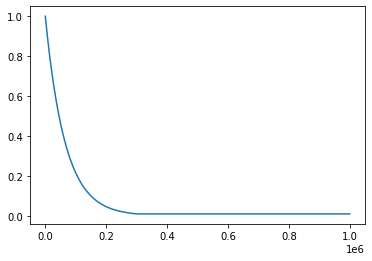

In [5]:
from utils.epsilon_greedy import EpsilonGenerator

eps = EpsilonGenerator(
    start=args["eps_start"], end=args["eps_end"],
    frame_num=args["eps_dec_frame"], ftype=args["eps_type"])
# our epsilon generator
epsilon = lambda frame : eps.epsilon(frame) if frame < args["eps_dec_frame"] else args["eps_end"]

plt.plot([epsilon(i) for i in range(1000000)])

# 5. Train

In [6]:
from agent.dqn_agent import DqnAgent

from function_approximator.atari_dqn import AtariDQN
from function_approximator.atari_duel_dqn import AtariDuelDQN

from utils.replay.replayer import Replay

Succeed making sketch book


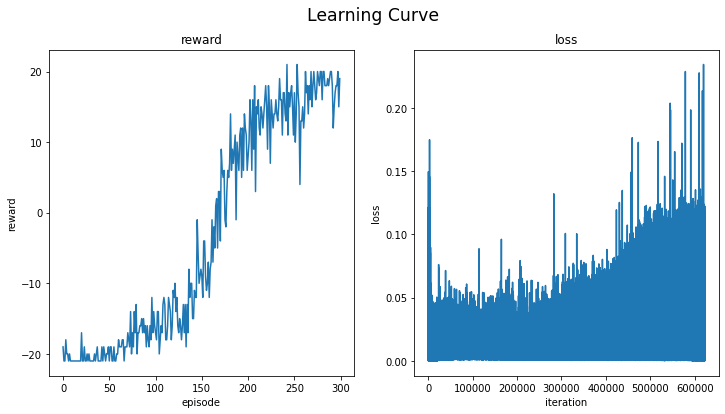

In [7]:
replay_buffer = Replay(capacity=args["replay_buffer_capacity"])

args["model_name"] = "dqn"
dqn_agent = DqnAgent(env=env, q_val=AtariDQN, replay_buffer=replay_buffer, epsilon=epsilon, args=args)
dqn_agent.training()

Succeed making sketch book


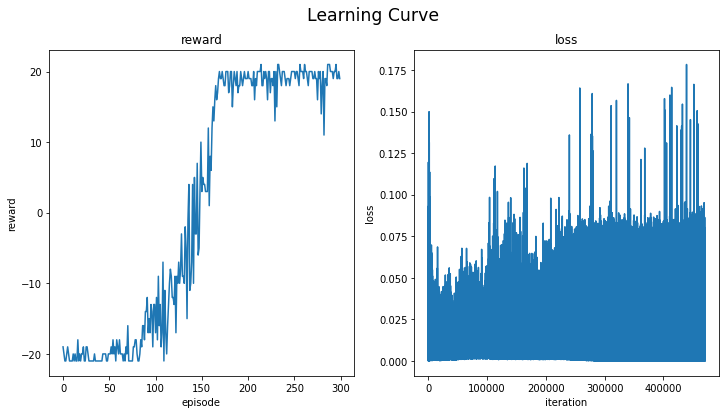

In [8]:
replay_buffer = Replay(capacity=args["replay_buffer_capacity"])

args["model_name"] = "duel_dqn"
duel_dqn_agent = DqnAgent(env=env, q_val=AtariDuelDQN, replay_buffer=replay_buffer, epsilon=epsilon, args=args)
duel_dqn_agent.training()

Succeed making sketch book


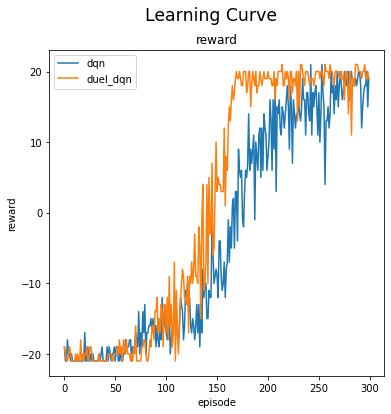

In [10]:
from common.plot import Plots
from common.common import plot_learning_curve as plot

learning_curve = Plots(fig=plt.figure(figsize=(6, 6)), subplot_num=1, position=(1, 1), suptitle="Learning Curve")
plot(sketch_book=learning_curve, 
     rewards=[dqn_agent.reward_sum_list, duel_dqn_agent.reward_sum_list],
     legend=["dqn", "duel_dqn"])